In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# 파일 불러오기

In [102]:
df = pd.read_csv("C:\\AI\\kc_house_data.csv") # 컬럼이 없을때는 header = None 붙이기
df
# 컬럼을 붙이고 싶다면 
# df.columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [103]:
# 불필요한 컬럼 제거 
df.drop(columns=['id'], inplace=True)
df.drop(columns=['date'], inplace=True)

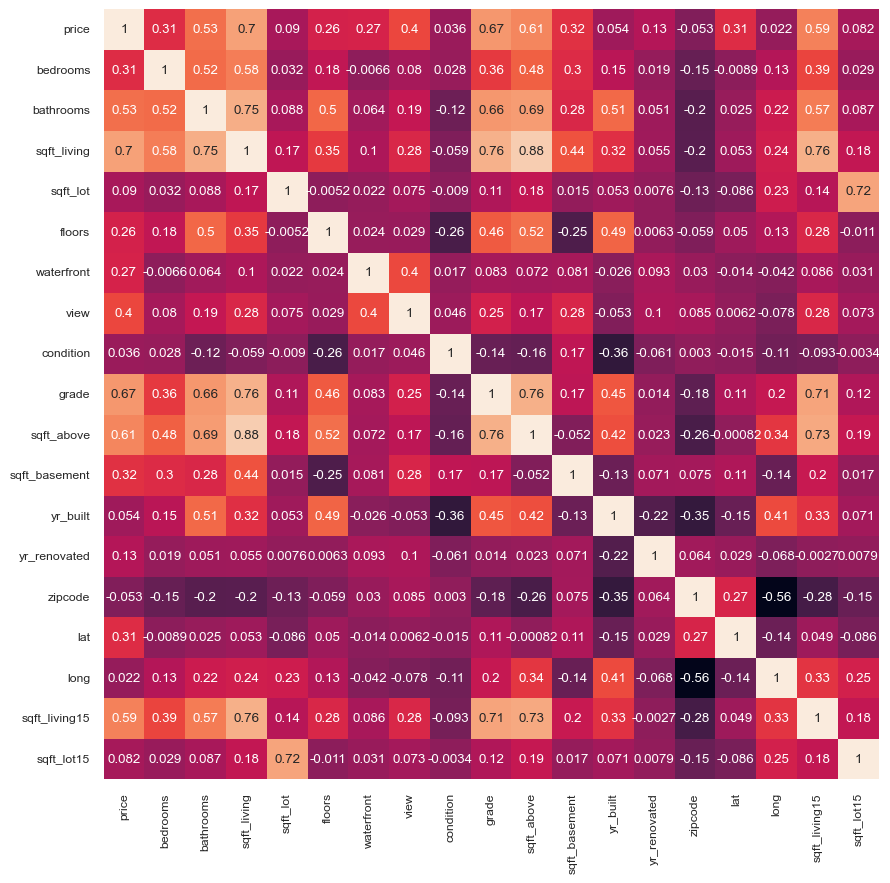

In [104]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [105]:
# 상관관계 행렬을 보고 관계가 없는 불필요한 나머지 feature들 제거
df.drop(columns=['zipcode'], inplace=True)
df.drop(columns=['yr_built'], inplace=True)
df.drop(columns=['sqft_lot'], inplace=True)
df.drop(columns=['sqft_lot15'], inplace=True)
df.drop(columns=['long'], inplace=True)

In [106]:
X=df.drop('price',axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,3,7,1180,0,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1991,47.7210,1690
2,2,1.00,770,1.0,0,0,3,6,770,0,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,5,7,1050,910,0,47.5208,1360
4,3,2.00,1680,1.0,0,0,3,8,1680,0,0,47.6168,1800


In [107]:
y=df['price']
y.value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

In [108]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [109]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [110]:
#원핫 인코딩
Y = pd.get_dummies(y).values

In [111]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [112]:
X = X.values

In [113]:
from sklearn.model_selection import train_test_split
#먼저 8:2 비율로 임시 : 테스트 데이터 나누기
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#임시 데이터를 또 8:2 비율로 트레인 : Validation 데이터로 나누기
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=0)

# shape를 통해 제대로 분리 됐는지 확인
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(15561, 13) (1729, 13) (4323, 13) (15561, 4028) (1729, 4028) (4323, 4028)


In [114]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(13,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\송민수\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,343 (5.25 KB)

 Trainable params: 1,343 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_val,y_val))
y_pred = model.predict(X_test)

Epoch 1/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10514.6611 - mse: 10514.6611 - val_loss: 12.5763 - val_mse: 12.5763
Epoch 2/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51.5516 - mse: 51.5516 - val_loss: 4.5394 - val_mse: 4.5394
Epoch 3/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3454 - mse: 2.3454 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 4/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 6.0071e-04 - val_mse: 6.0071e-04
Epoch 6/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 9.2496e-04 - val_mse: 9.2496e-04
Epoch 7/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 2.5400e-04 - val_mse: 2.5400e-04
Epoch 8/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 2.9098e-04 - val_mse: 2.9098e-04
Epoch 9/10
4

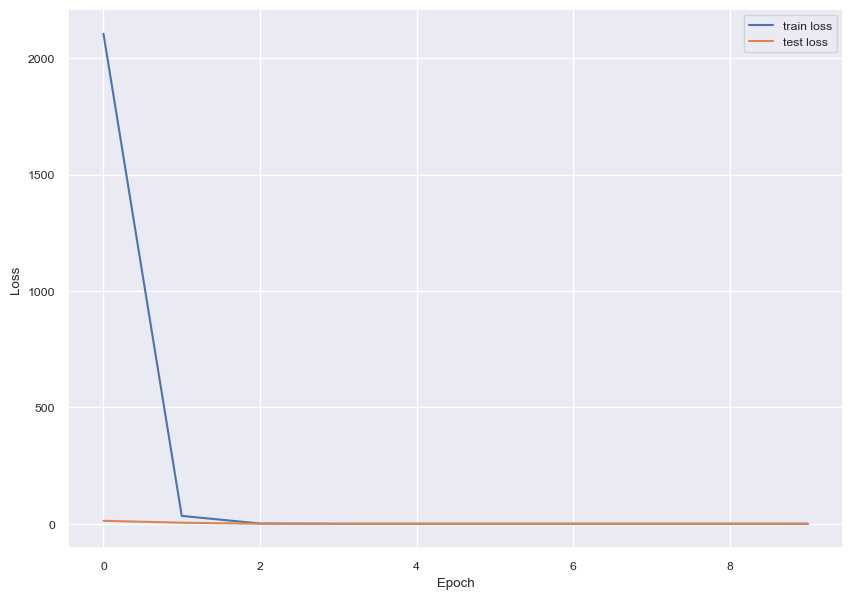

In [116]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [117]:
model.evaluate(X_test, y_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0385e-04 - mse: 3.0385e-04


[0.0009941704338416457, 0.0009941704338416457]